# Portada

## Estudiantes:

    Jason Solano 

    Percy herrara
## Curso
    
    Machine Learning
 
## Trabajo
    Projecto Final 

# Librerías utilizadas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

## Se cargan los datos, que han sido escogidos por medio del jupyter notebook ADA

In [4]:
df1 = pd.read_csv('DatosEscogidos.csv',index_col=0)

In [5]:
df1.head()

,account_payment_method,approval_amount,scheduled_payment_amt,days_past_due,past_due_amt,age,zip_code,city,sms_contacted_ts,state,years_at_current_residence,months_at_current_residence,source,email_contacted_ts,payment_frequency,number_of_payments,redeem_ts
0,2.0,250.0,18.84,0,0.0,31.0,80012,73.0,1.0,5.0,2,1,2.0,0.0,4.0,52,1.0
1,2.0,80.0,32.88,0,0.0,21.0,76086,1590.0,0.0,41.0,1,0,0.0,1.0,0.0,26,1.0
2,2.0,956.0,423.50,0,0.0,43.0,99344,1086.0,1.0,45.0,1,0,2.0,1.0,1.0,12,1.0
3,2.0,9.0,18.15,0,0.0,33.0,92251,684.0,1.0,4.0,0,11,2.0,0.0,0.0,26,1.0
4,2.0,250.0,87.73,0,0.0,38.0,44105,264.0,1.0,33.0,6,0,2.0,1.0,0.0,26,1.0


### Dividemos los datos de entrenamiento y label

In [8]:
features = df1.drop('redeem_ts',1)
labels = df1['redeem_ts']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.20,random_state=13)

# Prueba con los algoritmos Desicion Tree y Random Forest

# Pruebas con Desicion Tree

### Prueba con el hyper-parametro max_depth

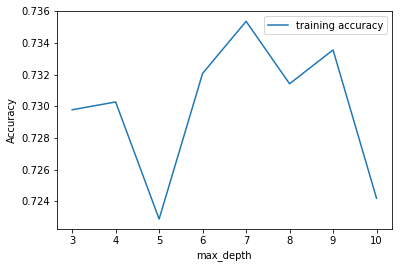

In [15]:
maxDepth = [3,4,5,6,7,8,9,10]
Acurracy = list()
for atri in maxDepth:
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
    max_depth=atri, min_samples_leaf=5)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(clf_entropy,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(maxDepth, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Para este caso se escoge el hyper-parametro mzx_depth = 7 

### Prueba con el hyper-parametro max_depth

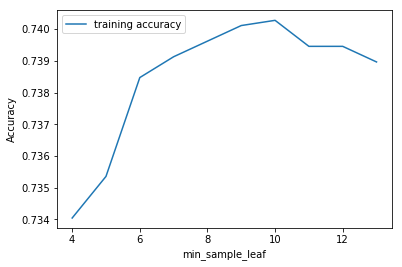

In [17]:
min_samples_leaf = [4,5,6,7,8,9,10,11,12,13]
Acurracy = list()
for atri in min_samples_leaf:
    # se construye el modelo de clasificacion
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
    max_depth=7, min_samples_leaf=atri)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(clf_entropy,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(min_samples_leaf, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_sample_leaf")
plt.legend()

### Para este caso se escoge el hyper-parametro min_sample_leaf = 10

# Conclusión
En el caso de desicion Tree el mejor accuracy segun cross-validation es 0.74 con los hyper-parametros 

max_depth = 7

min_sample_leaf = 10

Accuracy = 0.74

# Pruebas con Random Forest 

### Prueba con el hyper-parametro n_estimator

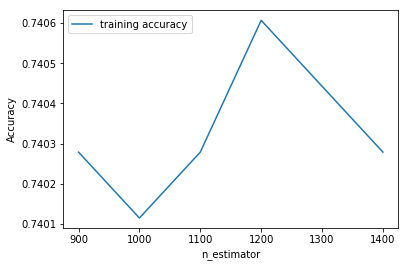

In [19]:
listAttrib = [900,1000,1100,1200,1300,1400]
Acurracy = list()
for atri in listAttrib:
    # se construye el modelo de clasificacion
    RandomForestModel = RandomForestClassifier(min_samples_leaf=5,min_samples_split=20,n_estimators=atri, max_depth= 5, random_state=10)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(RandomForestModel,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(listAttrib, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimator")
plt.legend()

### Para el caso del hyper-parametro n_estimator se escoge el valor 1200

### Prueba con el hyper-parametro max_depth

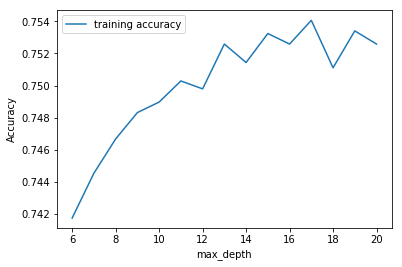

In [20]:
listAttrib = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Acurracy = list()
for atri in listAttrib:
    # se construye el modelo de clasificacion
    RandomForestModel = RandomForestClassifier(min_samples_leaf=5,min_samples_split=20,n_estimators=1200, max_depth= atri, random_state=10)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(RandomForestModel,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(listAttrib, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Para el caso del hyper-parametro max_depth se escoge el valor 17

### Prueba con el hyper-parametro min_samples_split

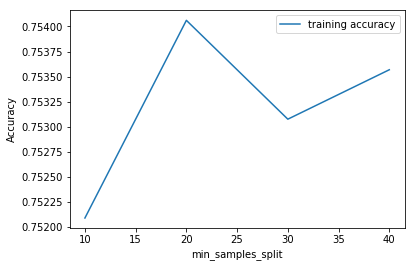

In [21]:
listAttrib = [10,20,30,40]
Acurracy = list()
for atri in listAttrib:
    # se construye el modelo de clasificacion
    RandomForestModel = RandomForestClassifier(min_samples_leaf=5,min_samples_split=atri,n_estimators=1200, max_depth=17, random_state=10)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(RandomForestModel,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(listAttrib, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.legend()

### Para el caso del hyper-parametro min_samples_split se escoge el valor 20

### Prueba con el hyper-parametro min_samples_split

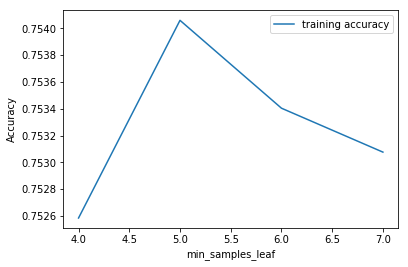

In [22]:
listAttrib = [4,5,6,7]
Acurracy = list()
for atri in listAttrib:
    # se construye el modelo de clasificacion
    RandomForestModel = RandomForestClassifier(min_samples_leaf=atri,min_samples_split=20,n_estimators=1200, max_depth=17, random_state=10)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(RandomForestModel,features,labels, cv=cv)
    Acurracy.append(scores.mean())
plt.plot(listAttrib, Acurracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.legend()

### Para el caso del hyper-parametro min_samples_leaf se escoge el valor 5

# Conclusión
En el caso del Random Forest el mejor accuracy segun cross-validation es 0.7540 con los hyper-parametros 

n_estimator = 1200

max_depth = 17

min_sample_leaf = 20

min_samples_leaf = 5

Accuracy = 0.7540

# Conclusión General

Visualizando los dos modelos, el desicion tree dura mucho menos entrenando y aplicando el cross-validation
, sin embargo su accuracy es 0.74. En cambio el random forest tiene un accuracy de 0.7540 es decir un
incremento de 0.0140 lo cual permite tener un modelo mas rubusto claro con más consumo computacional. 
Sin embargo el mejor modelo es el random forest